In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/dirty_retail_sales_data.csv')

In [3]:
df.head()

,Order_ID,Customer_Age,Gender,City,Product_Category,Quantity,Unit_Price,Payment_Mode
0,5175.0,25.0,Female,NaN,Furniture,4.0,400.0,NaN
1,5196.0,39.0,NaN,Chennai,Grocery,2.0,1300.0,UPI
2,5025.0,37.0,Female,Kolkata,Electronics,7.0,400.0,Card
3,5067.0,57.0,NaN,Mumbai,Clothing,3.0,800.0,Cash
4,5211.0,40.0,NaN,Delhi,Electronics,NaN,4400.0,Cash


* **Q1 ▶ Dataset me total rows & columns kitne hain?**

In [4]:
df.shape

(375, 8)

* **Answer 1 ▶ ['Rows - 350' , 'Column - 8']**

* **Q2 ▶ Kaunse columns me null values hain aur kitne %?**

* **Answer 2 : ⤵**

In [5]:
df.isnull().sum()

,0
Order_ID,5
Customer_Age,8
Gender,124
City,74
Product_Category,66
Quantity,42
Unit_Price,6
Payment_Mode,90


* **Q3 ▶ Duplicate rows kitni hain?**

In [6]:
df.duplicated().sum()

np.int64(25)

* **Answer 3 ▶ 25**

* **Q4 ▶ Duplicate rows ko remove karo**

* **Answer 4 : ⤵**

In [7]:
df.drop_duplicates(inplace = True)

* **Q5 ▶ Missing numeric values ko mean se fill karo (without column name)**


* **Answer 5 : ⤵**

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)

* **Q6 ▶ Missing categorical values ko mode / 'Unknown' se fill karo**

* **Answer 6 : ⤵**

In [9]:
df.fillna('Unknown', inplace = True)

* **Question 7 ▶ Total_Amount column banao**

* **Answer 7 : ⤵**

In [10]:
df['Total_Amount'] = df['Quantity'] * df['Unit_Price']

* **Question 8 ▶ Customer age ke basis par Age_Group banao**

* **Answer 8 : ⤵**

In [11]:
df['Age_Group'] = pd.cut(df['Customer_Age'] , bins= 5 , labels=['Teen/Young', 'Young Adult', 'Adult', 'Middle-aged', 'Senior'])

* **Question 9 ▶ High-value orders identify karo (Total_Amount > threshold)**

* **Answer 9 : ⤵**

In [12]:
df['Total_Amount'].describe()

,Total_Amount
count,350.000000
mean,12012.717049
std,9813.345393
min,200.000000
25%,4000.000000
50%,9400.000000
75%,18150.000000
max,44100.000000


In [13]:
threshold = 18150
df[df['Total_Amount'] > threshold]['Total_Amount'].value_counts()

,count
Total_Amount,
18400.0000,4
24500.0000,3
25200.0000,3
19319.7411,3
22400.0000,3
...,...
36900.0000,1
28000.0000,1
20700.0000,1


In [14]:
(df['Total_Amount'] > threshold).describe()

,Total_Amount
count,350
unique,2
top,False
freq,262


* **Question 10 ▶ City-wise total sales kya hai?**


* **Answer 10 : ⤵**

In [80]:
df.groupby('City')['Quantity'].sum()

,Quantity
City,
Bangalore,233.336570
Chennai,259.504854
Delhi,355.673139
Kolkata,263.336570
Mumbai,321.177994
Unknown,346.420712


* **Question 11 ▶ Product category-wise average order value kya hai?**

* **Answer 11 : ⤵**

In [77]:
df.groupby('Product_Category')['Total_Amount'].mean()

,Total_Amount
Product_Category,
Clothing,12137.484358
Electronics,13087.641039
Furniture,11923.278392
Grocery,12049.406569
Unknown,10630.313989


* **Question 12 ▶ Kaunsa payment mode sabse zyada use hota hai?**

In [17]:
df.sort_values(by = 'Payment_Mode', ascending = False , inplace = True)

In [18]:
df['Payment_Mode'].value_counts()

,count
Payment_Mode,
Cash,91
Card,90
Unknown,85
UPI,84


* **Answer 12 ▶ Cash Method is used more often followed by Card**

* **Question 13 ▶ Age group vs purchase behavior kya hai?**

* **Answer 13 : ⤵**

In [19]:
age_group_behavior = df.groupby('Age_Group', observed = True).agg({'Total_Amount': 'mean','Quantity': 'sum','Product_Category': lambda x: x.mode()[0]}).reset_index()

print(age_group_behavior)

     Age_Group  Total_Amount    Quantity Product_Category
0   Teen/Young  10992.779981  341.588997        Furniture
1  Young Adult  12428.632260  302.588997         Clothing
2        Adult  12400.838841  405.841424        Furniture
3  Middle-aged  11334.081843  324.588997         Clothing
4       Senior  12840.189358  404.841424          Unknown


* **Q14 ▶ Sales distribution (histplot)**

* **Answer 14 : ⤵**

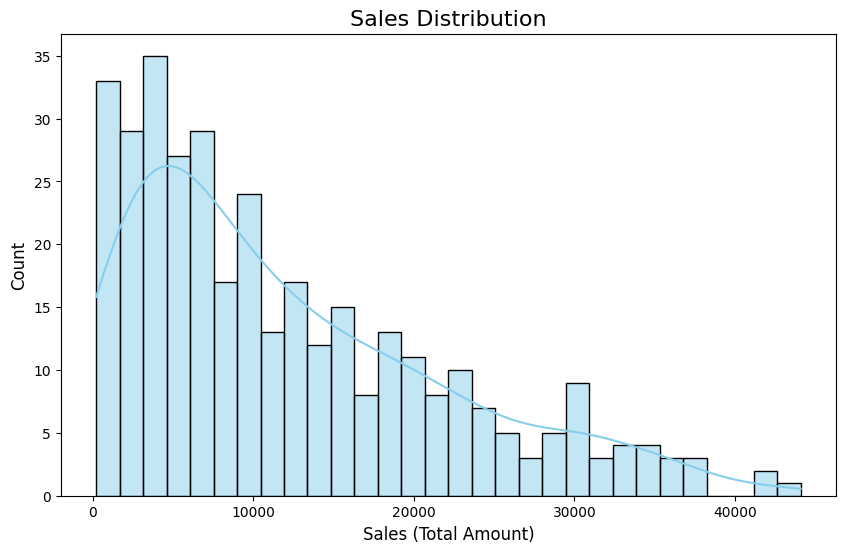

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Amount'], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title('Sales Distribution', fontsize=16)
plt.xlabel('Sales (Total Amount)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

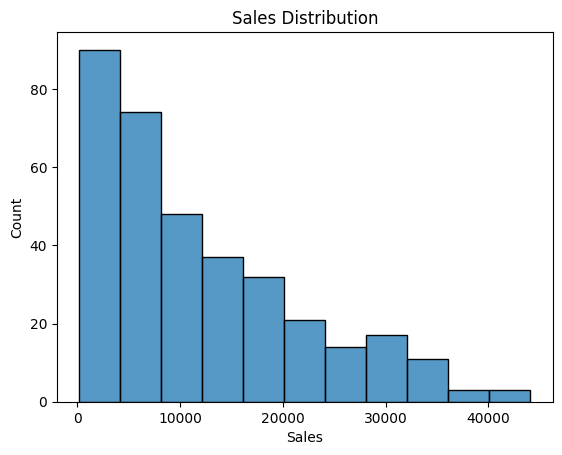

In [22]:
sns.histplot(df['Total_Amount'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

* **Q15 ▶ City vs Total Sales (barplot)**

* **Answer 15 : ⤵**

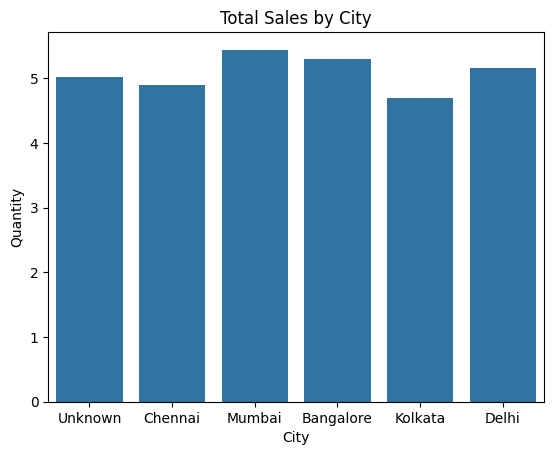

In [23]:
sns.barplot(x='City', y='Quantity', data=df, errorbar = None)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.show()

* **Q16 ▶ Product_Category vs Total_Amount (boxplot)**

* **Answer 16 : ⤵**

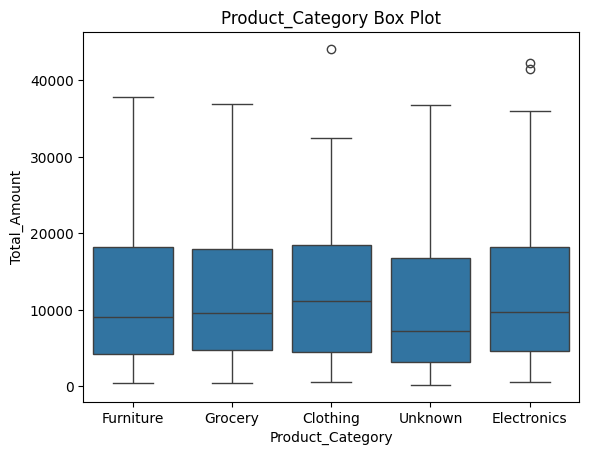

In [24]:
sns.boxplot(x=df['Product_Category'] , y=df['Total_Amount'])
plt.title('Product_Category Box Plot')
plt.xlabel('Product_Category')
plt.ylabel('Total_Amount')
plt.show()

Text(0.5, 1.0, 'Product_Category Box Plot')

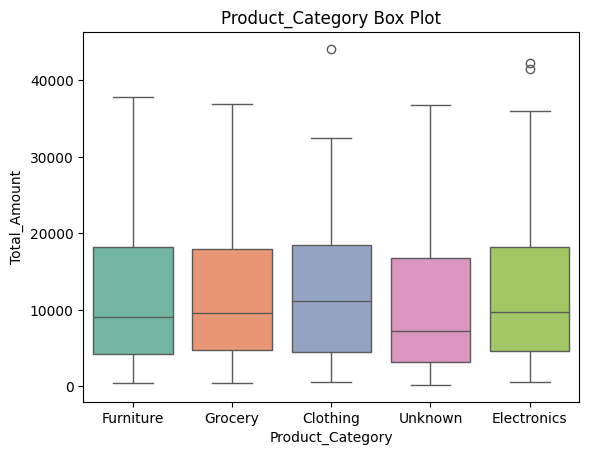

In [25]:
sns.boxplot(x='Product_Category',y='Total_Amount',hue='Product_Category',data=df,palette="Set2",legend=False)
plt.title('Product_Category Box Plot')

* **Q17 ▶ Age vs Total_Amount (scatterplot)**

* **Answer 17 : ⤵**

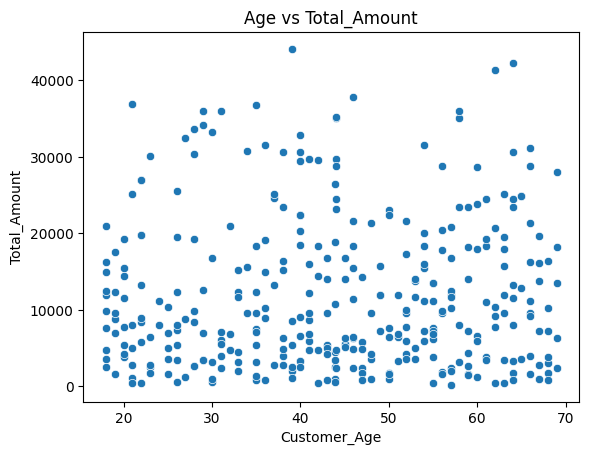

In [36]:
sns.scatterplot(x='Customer_Age', y='Total_Amount', data=df)
plt.title('Age vs Total_Amount')
plt.xlabel('Customer_Age')
plt.ylabel('Total_Amount')
plt.show()

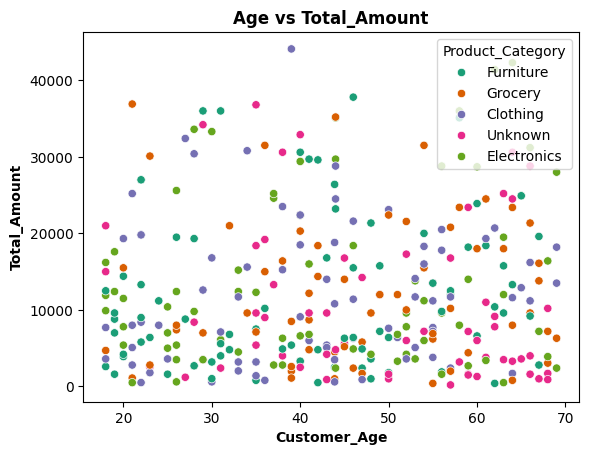

In [47]:
sns.scatterplot(x='Customer_Age', y='Total_Amount', hue='Product_Category', data=df, palette='Dark2')
plt.title('Age vs Total_Amount', fontsize=12, fontweight='bold')
plt.xlabel('Customer_Age', fontsize=10, fontweight='semibold')
plt.ylabel('Total_Amount', fontsize=10, fontweight='semibold')
plt.show()

* **Q18 ▶ Correlation heatmap (numeric columns)**

* **Answer 18 : ⤵**

In [51]:
df.corr(numeric_only=True)

,Order_ID,Customer_Age,Quantity,Unit_Price,Total_Amount
Order_ID,1.000000,0.002321,0.002843,0.063884,0.047647
Customer_Age,0.002321,1.000000,0.056050,-0.000455,0.041861
Quantity,0.002843,0.056050,1.000000,-0.047930,0.556887
Unit_Price,0.063884,-0.000455,-0.047930,1.000000,0.730200
Total_Amount,0.047647,0.041861,0.556887,0.730200,1.000000


* **Q19 ▶ Kaunse cities highest revenue generate karti hain?**

* **Answer 19 ▶ By Refrence of cell [23] data shows that "Mumbai" city is genrating highest revenue followed by Bangalore**

* **Q20 ▶ Kaunse products loss / low sales de rahe hain?**

In [73]:
df.groupby('Product_Category')['Quantity'].sum().nsmallest(1)

,Quantity
Product_Category,
Grocery,279.420712


In [74]:
df.groupby('Product_Category')['Quantity'].sum().idxmin()

'Grocery'

* **Answer  ▶ As per Analysis Grocery products are having lowest sales with count of 279 as compare to other items**

* **Q21 ▶ Company ko revenue improve karne ke liye 3 suggestions do!!**

* **Answer  ▶**
              
*1. Kolkata and Chennai have sales lower than the average, so the company should increase sales in these cities by offering special promotions and discounts.*

*2. Furniture has the highest sales and is mainly purchased by adults, so it should be promoted more.*
*Young adults buy fewer clothes, so clothing promotions should be increased for them.*
*Grocery has the lowest sales, so discounts and cashback offers should be given, especially because cash is the most used payment method.*

*3. Electronics have the highest average sales, so the company should maintain and increase the stock of electronic items.*
*To boost sales further, card-based offers should be provided since cards are the second most used payment method.*